In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [175]:
# 아이리스 데이터 불러오기
# 딕셔너리 와 비슷한 구조
iris = load_iris()

In [176]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [177]:
# target 데이터 
# 0 = setosa
# 1 = versicolor
# 2 = virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [203]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [206]:
spe = pd.Series(iris.target, dtype="category")
spe = spe.cat.rename_categories(iris.target_names)
df['species'] = spe
df['labels'] = iris.target

In [207]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,labels
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
labels               150 non-null int64
dtypes: category(1), float64(4), int64(1)
memory usage: 6.2 KB


In [209]:
df.describe(include="all")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,labels
count,150.000000,150.000000,150.000000,150.000000,150,150.000000
unique,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,virginica,NaN
freq,NaN,NaN,NaN,NaN,50,NaN
mean,5.843333,3.057333,3.758000,1.199333,NaN,1.000000
std,0.828066,0.435866,1.765298,0.762238,NaN,0.819232
min,4.300000,2.000000,1.000000,0.100000,NaN,0.000000
25%,5.100000,2.800000,1.600000,0.300000,NaN,0.000000
50%,5.800000,3.000000,4.350000,1.300000,NaN,1.000000
75%,6.400000,3.300000,5.100000,1.800000,NaN,2.000000


In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맥북이기에 애플고딕을 사용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

<function matplotlib.pyplot.show(*args, **kw)>

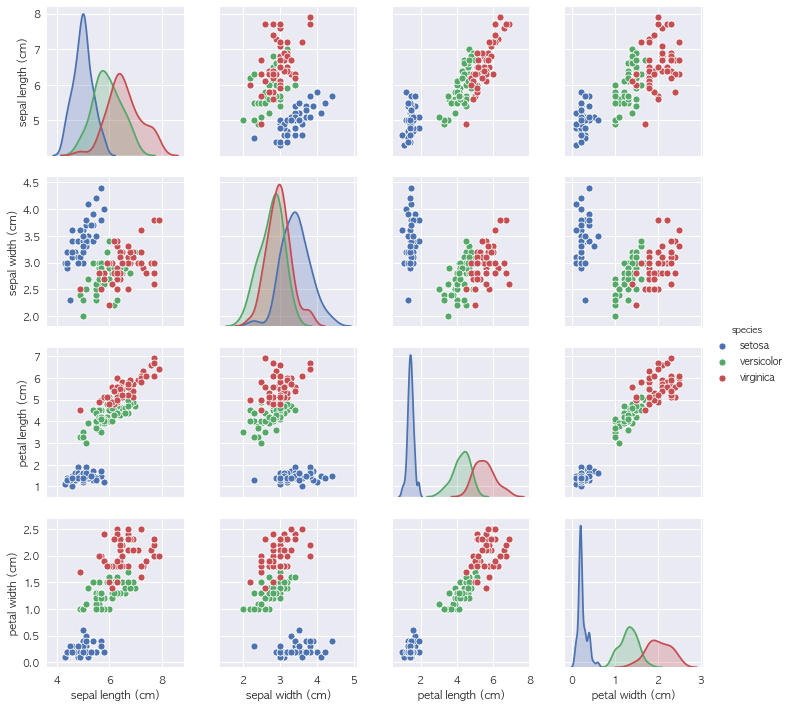

In [212]:
# label 칼럼 제외하고 pariplot 생성
sns.pairplot(df[df.columns[:5]], hue="species")
plt.show

# 1. 스케일링 및 분할

In [5]:
# iris 의 feature 변수는 X 로,
# iris 의 target 변수는 y 로
X = iris.data
y = iris.target

In [6]:
# 데이터 분할
# random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scale = StandardScaler() # 스케일링 모델 생성
X_train_std = scale.fit_transform(X_train) # train 데이터로 스케일링 모델을 fit

In [9]:
y_test_std = scale.transform(X_test) # test 데이터 스케일링

   - ## KNN 모델

In [13]:
# Knn 모델 생성
Knn = KNeighborsClassifier()

In [14]:
# 
Knn.fit(X_train, y_train)
print('학습용 데이터셋 정확도 {:.3f}'.format(Knn.score(X_train, y_train)))
print('테스트용 데이터셋 정확도 {:.3f}'.format(Knn.score(X_test, y_test)))

학습용 데이터셋 정확도 0.971
테스트용 데이터셋 정확도 0.956


In [15]:
# test 데이터로 예측한 y_test 결과
Knn.predict(X_test)

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1])

   - ## KNN - GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_params = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [18]:
gs = GridSearchCV(
    KNeighborsClassifier(), # estimatorestimator object.
    grid_params, # param_griddict or list of dictionaries
    verbose = 1, # Controls the verbosity: the higher, the more messages.
    cv = 3, # int, cross-validation generator or an iterable, optional
    n_jobs = -1 # -1 means using all processors.
    )

In [19]:
gs_results = gs.fit(X_train, y_train)
gs_results

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [20]:
# 가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(gs.best_params_))
# grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))
# test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-validity Score: 0.962
Test set Score: 0.956


   - ## KNN - GridSearchCV (neighbors만)

In [21]:
# GridSearch의 범위를 1에서 10까지로 지정함
grid_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]
}

In [22]:
# KNN 알고리즘에 GridSearch를 적용함
gs = GridSearchCV(
        KNeighborsClassifier(),
        grid_params,
        cv=10,
        return_train_score=True)

In [23]:
# train 데이터에 GridSearch를 적용함
gs_results = gs.fit(X_train, y_train)
gs_results

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [24]:
# 가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(gs.best_params_))
# grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))
# test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 7}
Best Cross-validity Score: 0.953
Test set Score: 0.956
